Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │        50,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,201 (215.63 KB)

 Trainable params: 55,201 (215.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5003 - loss: 94.7508 - val_accuracy: 0.4994 - val_loss: 4.5837
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5066 - loss: 5.0360 - val_accuracy: 0.5170 - val_loss: 1.2676
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5012 - loss: 1.6940 - val_accuracy: 0.5087 - val_loss: 0.9409
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5084 - loss: 1.1504 - val_accuracy: 0.4931 - val_loss: 0.8310
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5013 - loss: 0.9467 - val_accuracy: 0.4912 - val_loss: 0.7820
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4990 - loss: 0.8680 - val_accuracy: 0.4934 - val_loss: 0.7574
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5037 - loss: 0.8212 - val_accuracy: 0.4941 - val_loss: 0.7399
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5059 - loss: 0.7759 - val_accuracy: 0.5016 - val_lo

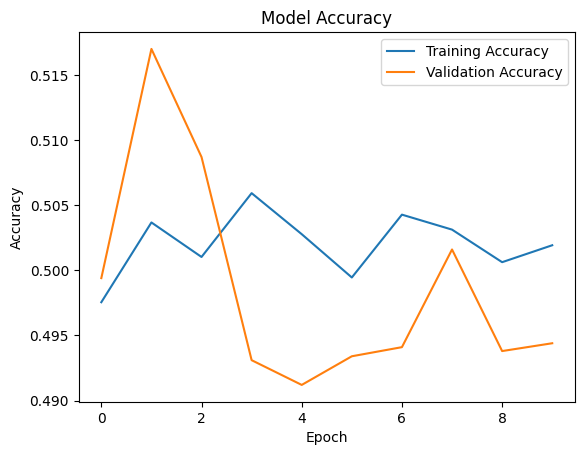

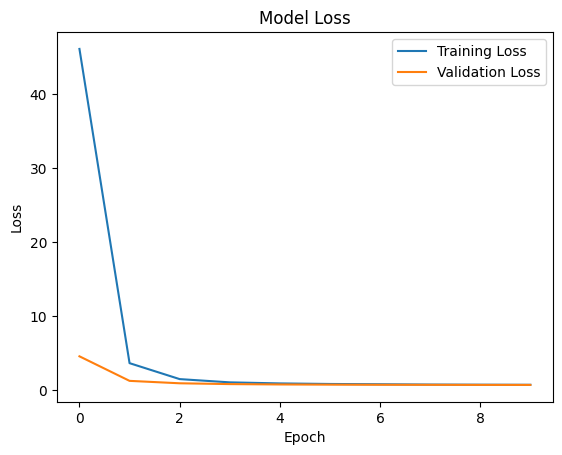

In [17]:
# Ashish Vikas Karche-A-54
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

# Load IMDB data with the most frequent 10000 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to a fixed length
max_len = 1000  # Choose the maximum length you want
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Concatenate data
data = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Ensure labels are in the appropriate format
labels = np.array(labels).astype("float32")

# Splitting the data into train and test sets
test_x = data[:10000]
test_y = labels[:10000]
train_x = data[10000:]
train_y = labels[10000:]

# Model architecture
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(max_len,)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(train_x, train_y,
                    epochs=10,
                    batch_size=500,
                    validation_data=(test_x, test_y))

# Evaluate the model
score = model.evaluate(test_x, test_y, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
